# HW2 Matplotlib and Numpy (86 points)

##Electronic submission due 11:59pm, Tue 2/28



### Study the script and complete cells to answer questions Q1-Q18.

To complete this homework, you need the data file named gradebook.txt, which contain the grades of 100 students in a class. (The homework script will download the file from github and use directly, or you can download the file from blackboard and save it in the same local folder as your homework script.) The data file contains 100 rows, each of which represents a student, and 20 columns: the first 10 columns are quizzes, the next 7 columns are homeworks, and the last three columns are exams. 

## Homework setup

import some modules (pandas is for io. you don't need it for anything else in this homework.)

load data from files into a numpy array: grades

define a variable: column_type 




In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [218]:
#%% load data file from github or from local file, and store in a (100x20) numpry array, grades

url1='https://raw.githubusercontent.com/jianhuaruan/3753/main/gradebook.txt'

url2='gradebook.txt'

try:
  # read from web
  grades=pd.read_table(url1, delimiter=' ', header=None).values
except Exception as error:
  # read from local if the online attempt failed
  grades=pd.read_table(url2, delimiter=' ', header=None).values

# grades is a numpy array
type(grades)

numpy.ndarray

In [219]:
# the values in the following numpy array (20 integers) may be useful to
# determine which column is for what. 
# 1 - quiz. 2 - homework. 3 - exam. 
column_type = np.array([1]*10 + [2]*7 + [3]*3)
column_type

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3])

## Examples

Example style to follow to display results. (If the last line in a cell is not an assignment, the variable value(s) will be displayed after execution of the cell. If you need to display multiple variables, either use print, or split into multiple cells.

In [164]:
# use print to show multiple lines

print('Shape of the array is: ', grades.shape)
print('Number of quizzes: ', (column_type == 1).sum())

Shape of the array is:  (100, 20)
Number of quizzes:  10


In [165]:
# show the median value of each column

np.median(grades, 0)

array([ 9. , 10. , 10. , 10. , 10. ,  9. , 10. ,  9. , 10. , 10. , 48. ,
       47. , 47.5, 49. , 46.5, 48. , 47. , 74. , 80. , 78. ])

In [166]:
# show the number of students who have received > 90 in the final exam
(grades[:, -1] > 90).sum()

4

In [167]:
# for each homework, show the number of students who received < 10 points
(grades[:, column_type == 2] <= 10).sum(axis=0)

array([5, 2, 4, 0, 3, 3, 2])

In [168]:
# find out who has received >=90 points in at least one exam
np.any(grades[:, -3:] >= 90, 1).nonzero()[0]

array([ 0,  2,  3,  4, 14, 24, 29, 37, 39, 57])

# Complete the following cells to answer Q1 - Q18.
For Q1-Q12: 3 points each. You should use as few lines as possible (ideally, one line or no more than two lines).

Q13: 5 points

Q14: 5 points

Q15-Q18: 10 points each

In [153]:
#%% Q1: show the max value of each column
np.max(grades,axis=0)

array([ 10,  10,  10,  10,  10,  10,  10,  10,  10,  10,  50,  50,  50,
        50,  50,  50,  50,  94, 100,  93], dtype=int64)

In [154]:
#%% Q2: show the min value of each column
np.min(grades,axis=0)

array([-2147483648, -2147483648, -2147483648, -2147483648, -2147483648,
       -2147483648, -2147483648, -2147483648, -2147483648, -2147483648,
       -2147483648, -2147483648, -2147483648,          21, -2147483648,
       -2147483648, -2147483648,          60,          64,          62],
      dtype=int64)

In [155]:
#%% Q3: Find out how many values in the array is negative 
(grades < 0).sum()

95

In [156]:
#%% Q4: Find out how many values in the array is NaN (using np.isnan function)
np.count_nonzero(np.isnan(grades))

0

In [220]:
#%% Q5. Replace negative values with 0. 
# Also find out how many values in the array is negative now (this is to double check. The answer should be 0.)
grades[grades < 0] = 0
(grades < 0).sum()

0

In [22]:
#%% Q6. find out the mean score of each exam
(grades[:, column_type == 3] ).mean(axis = 0)

array([75.25, 79.62, 77.16])

In [24]:
#%% Q7: find out the median score of each exam (using np.median)
np.median(grades[:,-3:],axis = 0)

array([74., 80., 78.])

In [35]:
#%% Q8. find out, for each exam, how many students had >= 80 
np.count_nonzero(grades[:,-3:] >= 80,axis = 0)

array([27, 56, 39], dtype=int64)

In [76]:
#%% Q9. find out how many students missed at least one homework (0 point in a homework indicates missing)
# suggested function to use: any(), sum()
(grades[:, column_type == 2] < 1).sum(axis = 0)

6

In [87]:
#%% Q10. find out how many students did all quizzes (0 point in a quiz indictes missing)
# suggested function to use: all(), sum()
np.all(grades[:,column_type == 1] > 0,1).sum()

42

In [121]:
#%% Q11. find out which students (row indices) had >= 88 points in two or more exams 
# suggested functions: sum, nonzero or where)
np.argwhere(grades[:,column_type == 3] >= 88)

array([[ 0,  0],
       [ 1,  2],
       [ 2,  2],
       [ 3,  0],
       [ 3,  1],
       [ 3,  2],
       [ 4,  1],
       [ 6,  1],
       [11,  2],
       [14,  2],
       [24,  0],
       [24,  1],
       [29,  2],
       [36,  2],
       [37,  1],
       [39,  1],
       [57,  1],
       [70,  1],
       [84,  0],
       [86,  1],
       [99,  1]], dtype=int64)

In [128]:
#%% Q12. find out, on average, how many quizzes each student participated
# suggested functions: sum, mean
np.count_nonzero(grades[:,column_type == 1] > 0, 1).mean()

9.19

In [190]:
#%% Q13.	(5 points). Use the argsort function to find out the five students who have 
# the lowest scores and report their indices (between 0 and 99). 
# Also report their grades for the three exams.
grades.argsort()[::-1][:5]


array([[49, 99, 17,  0, 99, 99,  0, 99, 99, 99, 99, 49,  0, 99,  0,  0,
         0,  3,  3,  3],
       [68, 67, 25, 58, 27, 23, 70, 67, 29, 27, 67, 67, 75, 27, 14, 29,
        13,  0,  4, 29],
       [59, 59, 35, 18, 61, 59, 68, 62, 60, 29, 64, 56, 11, 58, 74, 21,
        47, 24, 57,  2],
       [54, 58, 65, 70, 57, 57, 16, 57, 59, 31, 61, 55, 43, 57, 45, 22,
        16, 84, 39, 14],
       [52, 54, 64, 69, 55, 55, 65, 56, 57, 35, 57, 54, 70, 55, 72, 72,
        71, 64, 37,  1]], dtype=int64)

Text(0.5, 1.0, 'Fig 1')

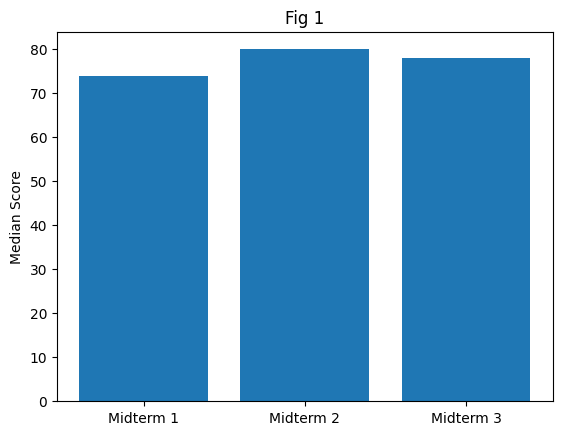

In [199]:
#%% Q14.	(5 points) Generate a bar chart for the median score of each exam (3 bars). 
exams = ["Midterm 1","Midterm 2","Midterm 3"]
median_exam = [np.median(grades[:,17]),np.median(grades[:,18]),np.median(grades[:,19])]
xs = range(len(exams))
plt.bar(xs,median_exam)
plt.xticks(xs, exams)
plt.ylabel("Median Score")
plt.title("Fig 1")

#### Your figure in Q14 shoud look like this: 
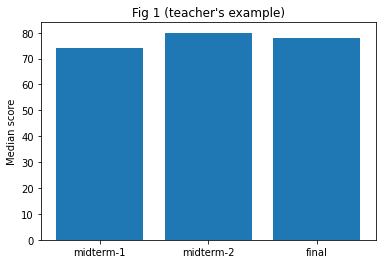

Text(0, 0.5, 'Exam Average')

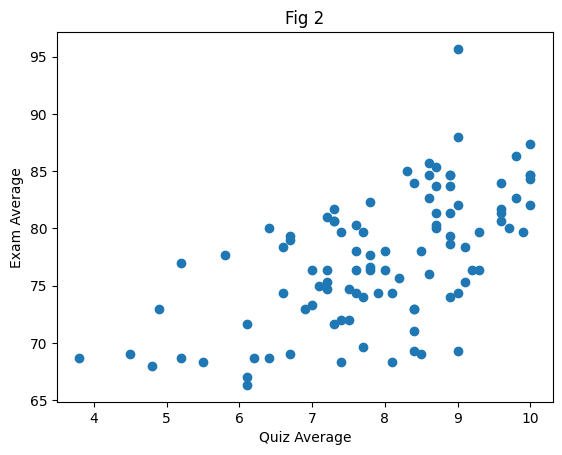

In [236]:
#%% Q15.	(10 points) Scatter plot, for each student, their average quiz score against their average exam score. 

medians_quiz = np.array(np.mean(grades[:,column_type == 1],axis = 1))
medians_exams = np.array( np.mean(grades[:,column_type == 3],axis = 1))
plt.scatter(medians_quiz,medians_exams)
plt.title("Fig 2")
plt.xlabel("Quiz Average")
plt.ylabel("Exam Average")


#### Your figure in Q15 shoud look like this

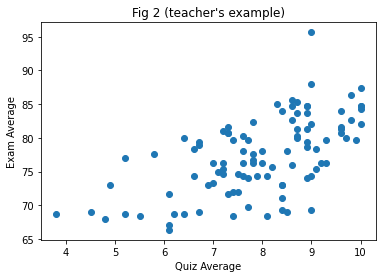

Text(0, 0.5, 'Column Index')

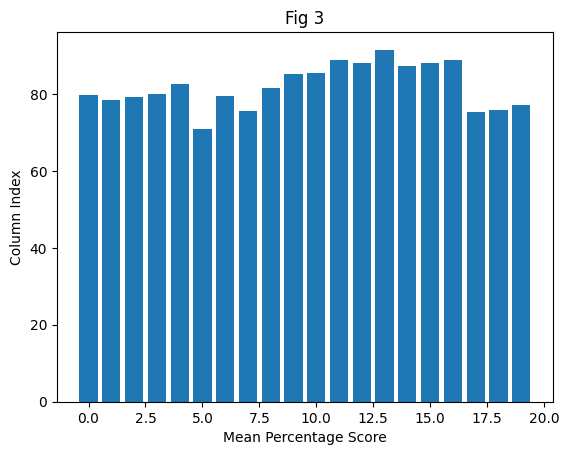

In [244]:
#%% Q16 (10 points)
# 1. Convert the raw scores in the gradebook to percentage: devide each column by its corresponding maximum possible score 
# and then multiply by 100.

# The max score is 10 points for each quiz, 50 points for each homework, 100 for midterm 1 and final, and 105 for midterm 2. 
# These values are already stored in the numpy array below for your convenience. 

# 2. Plot the mean value of each column in a bar chart.

# Suggested function: dot, diag, xticks

max_possible = np.array([10]*10 + [50]*7 + [100, 105, 100])

grades_perc = (grades / max_possible) * 100

mean_perc = np.array(np.mean(grades_perc,axis =0))


xs = range(len(mean_perc))
plt.bar(xs,mean_perc)
plt.title("Fig 3")
plt.xlabel("Mean Percentage Score")
plt.ylabel("Column Index")

#### Your figure in Q16 shoud look like this:

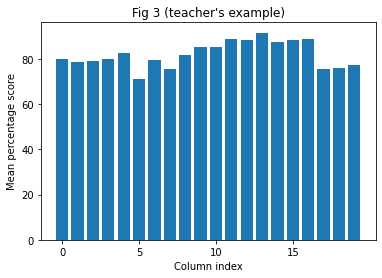

In [299]:
#%% Q17.	(10 points) Use the converted percentage score above, compute a final weighted average score for each student: 
# each quiz counts 2%, each hw counts 5%, exam 1 counts 15%, exam 2 counts 10% each, and the final exam counts 20%. 
# Round the final score to the nearest integer. 
# Report the following statistics for the final scores: max, min, median, mean, standard deviation.

# suggested functions: dot, round, std

hw_array = np.array(np.mean(grades_perc[:,column_type == 2],axis = 1) * .35)
quiz_array = np.array(np.mean(grades_perc[:,column_type == 1],axis = 1) * .20)


e1_array = np.array(grades_perc[:,17] * .15)
e2_array = np.array(grades_perc[:,18] * .10)
e3_array =np.array(grades_perc[:,19] * .20)
array_total = np.array(hw_array + quiz_array + e1_array + e2_array+ e3_array)


print('Statistics  for final grade:')
print('\t max: ', array_total.max())
print('\t min: ' ,array_total.min())
print('\t median: ',np.median(array_total) )
print('\t mean: ' ,array_total.mean())
print('\t std: ' ,array_total.std())


Statistics  for final grade:
	 max:  93.63095238095238
	 min:  57.733333333333334
	 median:  82.62142857142857
	 mean:  81.05835714285713
	 std:  7.651427174797163


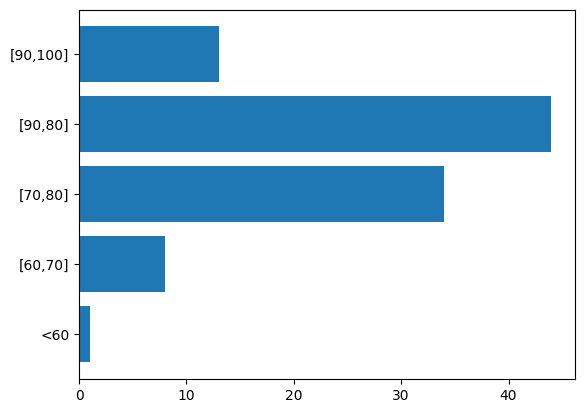

In [315]:
#%% Q18.	(10 points) Count the number students whose final score is in the following range: < 60; >=60 and < 70, >=70 and < 80, >=80 and < 90, and >= 90, and plot the counts as a bar chart.

groups = ["[90,100]","[90,80]","[70,80]","[60,70]","<60"]

count1 = ((90 <= array_total) & (array_total < 100)).sum()
count2 = ((80 <= array_total) & (array_total < 90)).sum()
count3= ((70 <= array_total) & (array_total < 80)).sum()
count4= ((60 <= array_total) & (array_total <70)).sum()
count5 = ((array_total < 60)).sum()

counts = np.array([count1,count2,count3,count4,count5])
plt.barh(groups,counts)
plt.gca().invert_yaxis()
plt.title("Fig 4")
plt.xlabel("Number of Students")
plt.ylabel("Final Score")


#### Your figure in Q18 shoud look like this: 

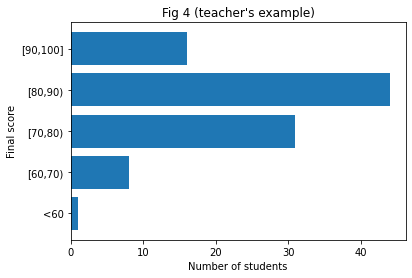